In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import sklearn
import torch
import seaborn as sns

from tqdm.notebook import trange

from torch import nn
from torch.nn import functional as F
from torchvision.datasets import MNIST
from torchvision import transforms

from sklearn.datasets import make_circles
from sklearn.linear_model import LogisticRegression

plt.style.use("ggplot")

# Zbiór danych z okręgami

W tym notebooku pokażemy że sieci neuronowe są w stanie rozwiązywać problemy, w których granica decyzyjna nie jest liniowa. Zaczniemy od wygenerowania i wizualizacji zbioru danych.

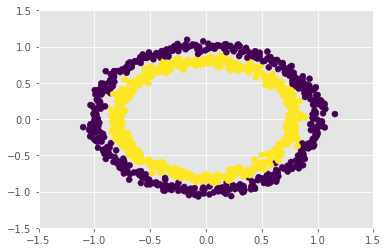

In [2]:
points, labels = make_circles(n_samples=1000, noise=0.04)

plt.scatter(points[:, 0], points[:, 1], c=labels)
plt.ylim(-1.5, 1.5)
plt.xlim(-1.5, 1.5)
plt.show()

Teraz wytrenujemy na tym zbiorze danych regresję logistyczną oraz sieć neuronową i porównamy ich wyniki.

In [4]:
# Trenowanie regresji logistycznej
lr = LogisticRegression(penalty="none")
lr.fit(points, labels)


# Trenowanie sieci neuronowej
net = nn.Sequential(nn.Linear(2, 10), nn.Sigmoid(), nn.Linear(10, 1), nn.Sigmoid())
optimizer = torch.optim.SGD(net.parameters(), lr=2)

x = torch.tensor(points).float()
y = torch.tensor(labels).float()
for epoch_idx in range(1000):
    preds = net(x)
    loss = F.binary_cross_entropy(preds, y.unsqueeze(-1))
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    if epoch_idx % 100 == 0:
        print(loss.item())

0.6937065720558167
0.69273442029953
0.6918200850486755
0.6887326836585999
0.6775249242782593
0.6548730134963989
0.5908023715019226
0.6643431782722473
0.487915962934494
0.4456048309803009


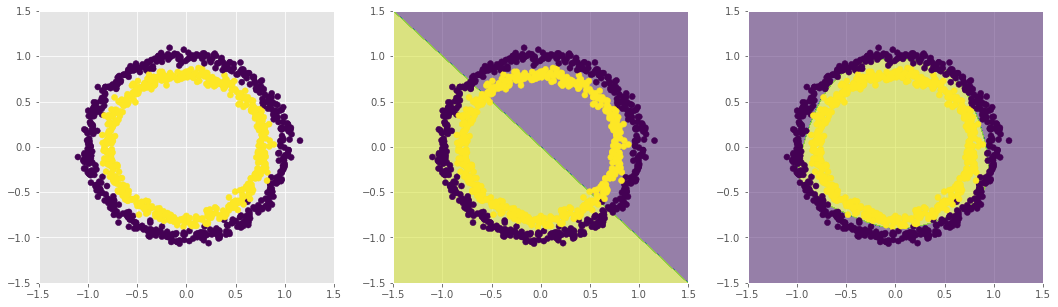

In [5]:
def plot_circles(points, labels, logistic_regression, neural_net):
    fig, axes = plt.subplots(1, 3, figsize=[18, 5])
    for ax in axes:
        ax.set_ylim(-1.5, 1.5)
        ax.set_xlim(-1.5, 1.5)
    axes[0].scatter(points[:, 0], points[:, 1], c=labels)

    # Linear classifier
    x = np.linspace(-1.5, 1.5, num=1000)
    y = np.linspace(-1.5, 1.5, num=1000)
    xx, yy = np.meshgrid(x, y)
    grid = np.stack([xx.ravel(), yy.ravel()], 1)

    preds = logistic_regression.predict(grid).reshape(1000, 1000)
    axes[1].contourf(xx, yy, preds, alpha=0.5)
    axes[1].scatter(points[:, 0], points[:, 1], c=labels)

    # Net
    torch_grid = torch.tensor(grid).float()
    preds = neural_net(torch_grid).detach().numpy().reshape(1000, 1000).round()
    axes[2].contourf(xx, yy, preds, alpha=0.5)
    axes[2].scatter(points[:, 0], points[:, 1], c=labels)


plot_circles(points, labels, lr, net)

# Wykorzystanie różnych aktywacji do problemu XOR

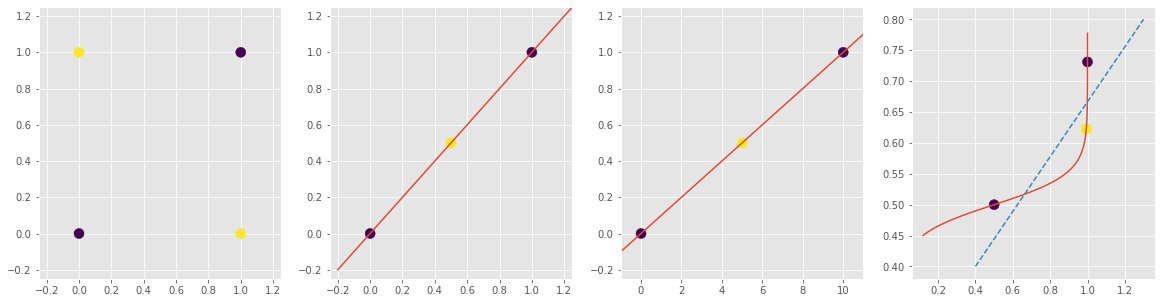

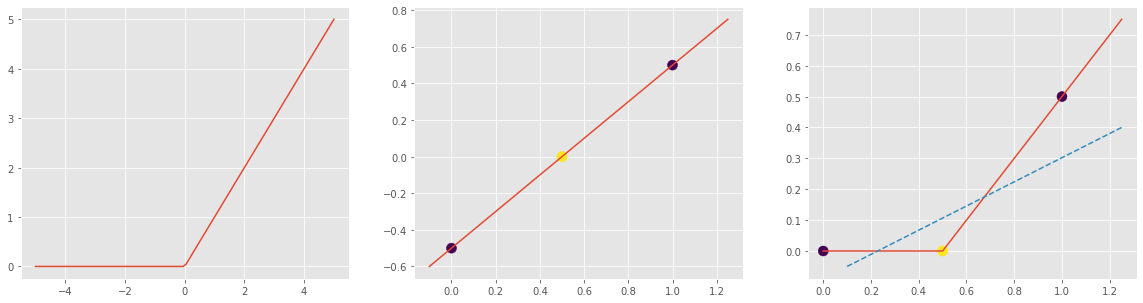

In [6]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def relu(x):
    return np.clip(x, 0, np.inf)


def plot_sigmoid_xor(points, labels):
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))
    for idx, ax in enumerate(axes):
        if idx < 2:
            ax.set_xlim(-0.25, 1.25)
            ax.set_ylim(-0.25, 1.25)

    axes[0].scatter(points[:, 0], points[:, 1], c=labels, s=100)

    points = points @ (np.ones([2, 2]) / 2.0)
    line = (points[0] - points[3]).reshape(1, -1)
    interp = np.linspace(-0.2, 1.25, num=100).reshape(-1, 1)
    line = points[3] + line * interp

    axes[1].scatter(points[:, 0], points[:, 1], c=labels, s=100)
    axes[1].plot(line[:, 0], line[:, 1])
    points = points @ np.array([[10.0, 0], [0.0, 1]])
    line = line @ np.array([[10.0, 0], [0.0, 1]])

    axes[2].set_xlim(-1, 11)
    axes[2].set_ylim(-0.25, 1.25)
    axes[2].scatter(points[:, 0], points[:, 1], c=labels, s=100)
    axes[2].plot(line[:, 0], line[:, 1])

    points = sigmoid(points)
    line = sigmoid(line)

    axes[3].scatter(points[:, 0], points[:, 1], c=labels, s=100)
    axes[3].plot(line[:, 0], line[:, 1])
    axes[3].plot([0.4, 1.3], [0.4, 0.8], "--")
    plt.show()
    plt.close()


def plot_relu_xor(points, labels):
    fig, axes = plt.subplots(1, 3, figsize=(20, 5))

    x = np.linspace(-5, 5, num=100)
    y = relu(x)
    axes[0].plot(x, y)

    points = points @ (np.ones([2, 2]) / 2.0) + np.array([0.0, -0.5])
    line = (points[0] - points[3]).reshape(1, -1)
    interp = np.linspace(-0.1, 1.25, num=100).reshape(-1, 1)
    line = points[3] + line * interp

    axes[1].scatter(points[:, 0], points[:, 1], c=labels, s=100)
    axes[1].plot(line[:, 0], line[:, 1])

    points = relu(points)
    line = relu(line)

    axes[2].scatter(points[:, 0], points[:, 1], c=labels, s=100)
    axes[2].plot(line[:, 0], line[:, 1])
    axes[2].plot([0.1, 1.25], [-0.05, 0.4], "--")
    plt.show()
    plt.close()


points, labels = np.array([[1.0, 1.0], [1.0, 0.0], [0.0, 1], [0, 0]]), [0, 1, 1, 0]

plot_sigmoid_xor(points, labels)

plot_relu_xor(points, labels)